# Movies Data Cleaning and EDA

In [192]:
# Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [193]:
#read the movie dataset and create the dataframes
movies_df = pd.read_csv("movies.csv")
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

We can drop all unnecessary columns. I.E in this case they are "keywords","homepage", "status","tagline",
                         "original_language", "overview", "production_companies", "original_title"

In [194]:
movies_df = movies_df.drop(columns = ["keywords","homepage", "status","tagline",
                         "original_language", "overview", "production_companies", "original_title"])

#### Remove any duplicate rows

In [195]:
movies_df.drop_duplicates(inplace =True)

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. These can therefore be discarded.

In [196]:
movies_df = movies_df.loc[movies_df["revenue"] != 0]
movies_df = movies_df.loc[movies_df["budget"]!=0]

#### To manipulate the columns easily, it is important that all ours data is of the correct data type.

In [197]:
# Change the release_date column to DateTime column
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])
# Extract the release year from every release date
movies_df["year"] = movies_df["release_date"].dt.strftime("%Y")

Change budget and revenue columns format to integer using numpy’s int64 method.

In [198]:
movies_df["budget"] = np.int64(movies_df["budget"])
movies_df["revenue"] = np.int64(movies_df["revenue"])
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
year                            object
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [199]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
# parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


## Exploration

### The 5 most expensive movies.

In [200]:
movies_df["profit"] = movies_df["revenue"] - movies_df["budget"]
movies_df["yield%"] = round((movies_df["profit"]/movies_df["budget"])*100,0)
top_5_budgets = movies_df[["title", "budget", "revenue", "profit", "yield%"]].sort_values("budget", ascending =False).head()
top_5_budgets

,title,budget,revenue,profit,yield%
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802,175.0
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,220.0
7,Avengers: Age of Ultron,280000000,1405403694,1125403694,402.0
10,Superman Returns,270000000,391081192,121081192,45.0
4,John Carter,260000000,284139100,24139100,9.0


In [201]:
movies_df = movies_df.loc[movies_df["budget"]>=1000]
movies_df["profit"] = movies_df["revenue"] - movies_df["budget"]
bottom_5_budgets = movies_df[["title", "budget", "revenue", "profit", "yield%"]].sort_values("budget", ascending =True).head()
bottom_5_budgets

,title,budget,revenue,profit,yield%
4796,Primer,7000,424760,417760,5968.0
4696,Weekend,8000,469947,461947,5774.0
4724,Eraserhead,10000,7000000,6990000,69900.0
4788,Pink Flamingos,12000,6000000,5988000,49900.0
4577,Paranormal Activity,15000,193355800,193340800,1288939.0


In [202]:
mean_profit_high_budget = top_5_budgets["profit"].mean()
mean_profit_low_budget = bottom_5_budgets["profit"].mean()
print(f"""
Average profit made on 5 biggest budget movies ${mean_profit_high_budget}
Average profit made on 5 lowest budget movies ${mean_profit_low_budget}
Average profit difference = ${round(mean_profit_high_budget - mean_profit_low_budget,0)}""")


Average profit made on 5 biggest budget movies $519467557.6
Average profit made on 5 lowest budget movies $41439701.4
Average profit difference = $478027856.0


After calculating the profits of the biggest and lowest 5 budget movies we can calculate the mean profit made and compare. The average difference in profit is $478,027,856 showing that generally big budget movies make a lot more profit, however in terms of yield, compared to how much money has been put into the movie, small budget movies can generate much larger profit margins with the lowest profit yield in the 5 cheapest movies equalling nearly 5774% compared to the largest yield in the top budgets only being 402%

#### Lets look at the top 5 most profitable movies. 
Subtracting the budget from the revenue generated, will return the profit earned.

In [203]:
#concatenating the top 5 and bottom 5 revenue movies
top_and_bottom_profits = pd.concat([movies_df[["title","genres", "budget", "revenue","profit", "yield%"]].sort_values("profit", ascending =False).head(), movies_df[["title","genres", "budget", "revenue", "profit", "yield%"]].sort_values("profit", ascending =False).tail()])
top_and_bottom_profits


,title,genres,budget,revenue,profit,yield%
0,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,2787965087,2550965087,1076.0
25,Titanic,"['Drama', 'Romance', 'Thriller']",200000000,1845034188,1645034188,823.0
28,Jurassic World,"['Action', 'Adventure', 'Science Fiction', 'Th...",150000000,1513528810,1363528810,909.0
44,Furious 7,['Action'],190000000,1506249360,1316249360,693.0
16,The Avengers,"['Science Fiction', 'Action', 'Adventure']",220000000,1519557910,1299557910,591.0
311,The Adventures of Pluto Nash,"['Action', 'Comedy', 'Science Fiction']",100000000,7103973,-92896027,-93.0
208,The 13th Warrior,"['Adventure', 'Fantasy', 'Action']",160000000,61698899,-98301101,-61.0
141,Mars Needs Moms,"['Adventure', 'Animation', 'Family']",150000000,38992758,-111007242,-74.0
338,The Alamo,"['Western', 'History', 'War']",145000000,25819961,-119180039,-82.0
13,The Lone Ranger,"['Action', 'Adventure', 'Western']",255000000,89289910,-165710090,-65.0


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [248]:
movies_over_7 = movies_df.loc[movies_df["vote_average"]>7, ["title","popularity","vote_average"]].sort_values("vote_average", ascending = False)
movies_over_7

,title,popularity,vote_average
2970,There Goes My Baby,0.037073,8.5
1881,The Shawshank Redemption,136.747729,8.5
3337,The Godfather,143.659698,8.4
3865,Whiplash,192.528841,8.3
3232,Pulp Fiction,121.463076,8.3
...,...,...,...
1015,K-PAX,30.920075,7.1
3479,The Virgin Suicides,26.218912,7.1
3511,Videodrome,18.119265,7.1
1745,My Sister's Keeper,24.091520,7.1


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well.

In [247]:
movies_group_year = movies_df[["year", "profit"]].groupby(by ="year").sum()
movies_group_year.sort_values("profit", ascending = False).head()



,profit
year,
2014,17029736072
2012,16665370551
2015,16082841939
2013,15181240631
2009,13798015000


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [207]:
movies_group_genre = movies_df[["genres", "popularity"]].groupby(by ="genres").mean()
movies_group_genre.sort_values("popularity", ascending = False)
# sns.barplot(x="genre", y=)
movies_df["genres"] = movies_df["genres"].apply(ast.literal_eval)

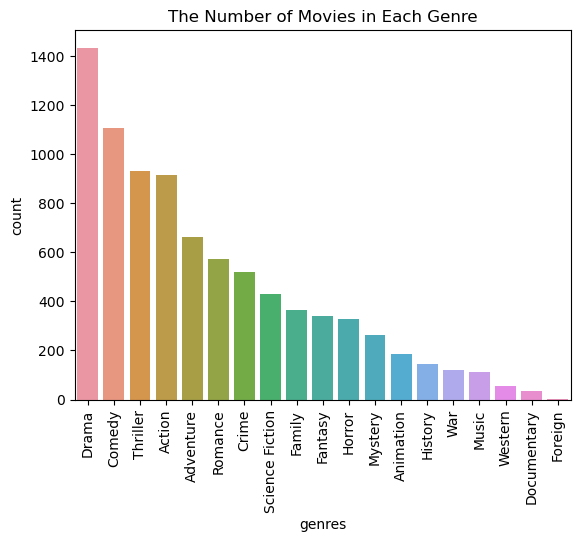

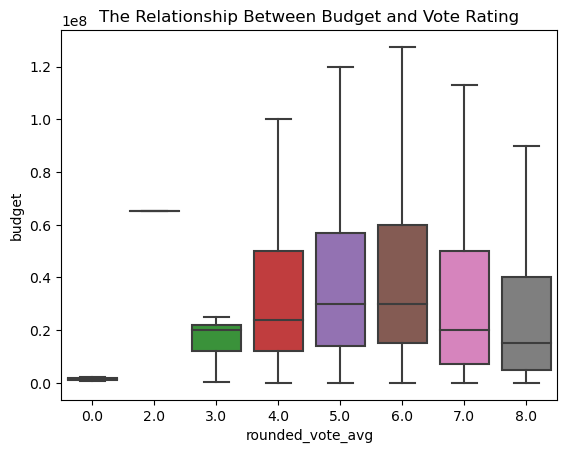

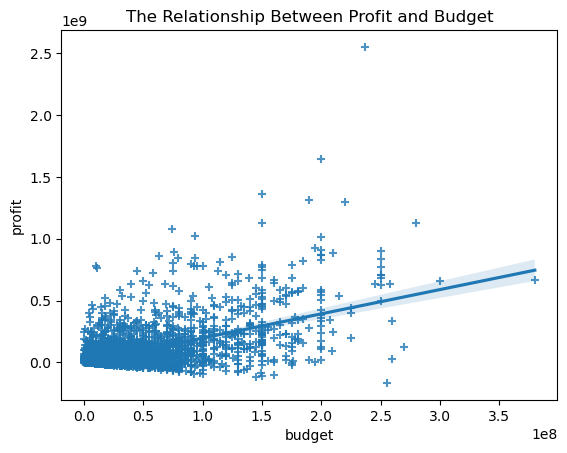

In [246]:
#### Generate three different interesting visualisations with a data story.
sns.countplot(data=movies_df, x= movies_df.genres.explode(), order = movies_df.genres.explode().value_counts().index).set(title="The Number of Movies in Each Genre")
plt.xticks(rotation=90)
plt.show()

        
movies_df["rounded_vote_avg"] = round(movies_df["vote_average"],0)
sns.boxplot(data=movies_df, x="rounded_vote_avg", y="budget", showfliers = False).set(title="The Relationship Between Budget and Vote Rating")
plt.show()

# sns.scatterplot(data=movies_df, x = "budget", y= "profit",, marker = "+")
sns.regplot(x="budget", y="profit", data=movies_df, marker="+").set(title="The Relationship Between Profit and Budget")
plt.show()


The first graph shows the frequent genres of movies, showing dramas are the most popular genre to make and documentarys and foreign films are the least, within this dataset. 

The second graph shows the relationship between budget and vote rating and shows that budget does not translate to high ratings as the movies with the highest average budgets average a rating of around 6 whereas the top rated movies tend to have a midrange budget.

The third graph shows the relationship between profit and budget. The plotted trendline shows that in general higher budget moveies tend to be more profitable, despite (as shown in figure 2) not always being top rated. This could be down to having more money to be poured into advertising and marketing.